<a href="https://colab.research.google.com/github/hawkeyedatatsai/Analysis-of-KMeans/blob/main/2_Analysis_of_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task
We are interested in grouping our customers into groups based on similar characteristics. This can help the company effectively allocate marketing resources. We will use customer age, education, years of employment, income, debt, whether they defaulted, and their debt to income ratio to group them into segments.

Data [source](https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/cust_seg.csv). and [origin](https://github.com/Nikhil-Adithyan/Customer-Segmentation-with-K-Means).



In [ ]:
from IPython.core.display import Path
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
Path ='/content/2-cust_seg.csv'
df = pd.read_csv(Path)
print(df.describe())
print('\n')
print(df.info())
print('\n')
df.head()

       Unnamed: 0  Customer Id         Age         Edu  Years Employed  \
count   850.00000    850.00000  850.000000  850.000000      850.000000   
mean    424.50000    425.50000   35.029412    1.710588        8.565882   
std     245.51816    245.51816    8.041432    0.927784        6.777884   
min       0.00000      1.00000   20.000000    1.000000        0.000000   
25%     212.25000    213.25000   29.000000    1.000000        3.000000   
50%     424.50000    425.50000   34.000000    1.000000        7.000000   
75%     636.75000    637.75000   41.000000    2.000000       13.000000   
max     849.00000    850.00000   56.000000    5.000000       33.000000   

           Income   Card Debt  Other Debt   Defaulted  DebtIncomeRatio  
count  850.000000  850.000000  850.000000  700.000000       850.000000  
mean    46.675294    1.576820    3.078773    0.261429        10.171647  
std     38.543054    2.125843    3.398799    0.439727         6.719441  
min     13.000000    0.012000    0.046000

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [ ]:
df = df.drop(["Unnamed: 0", "Customer Id"], axis=1)
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [ ]:
#check for duplicates
df.duplicated().sum()

0

In [ ]:
df.isna().sum()/len(df)*100
#not going to drop column since there are no significantly missing values

Age                 0.000000
Edu                 0.000000
Years Employed      0.000000
Income              0.000000
Card Debt           0.000000
Other Debt          0.000000
Defaulted          17.647059
DebtIncomeRatio     0.000000
dtype: float64

In [ ]:
# Instantiate Standard Scaler
scaler = StandardScaler()
#handle missing values on numeric by using most_frequent strategy
#because defaulted is only 1s and 0s, not ideal to use mean
most_frequent_imputer = SimpleImputer(strategy = "most_frequent")
missing_num_pipeline = make_pipeline(most_frequent_imputer, scaler)
missing_num_cols = ['Defaulted']
missing_num_tuple = (missing_num_pipeline, missing_num_cols)

num_df = df.drop(columns = 'Defaulted')
num_list = list(num_df.columns)
num_tuple = (scaler, num_list)

preprocessor = make_column_transformer(missing_num_tuple, num_tuple, 
                                       remainder="drop", 
                                       verbose_feature_names_out=False)
# Fit & transform data.
scaled_df = preprocessor.fit_transform(df)

#Use KMeans to create various customer segments.


##Use an Elbow Plot of inertia.


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0, 0.5, 'inertia')

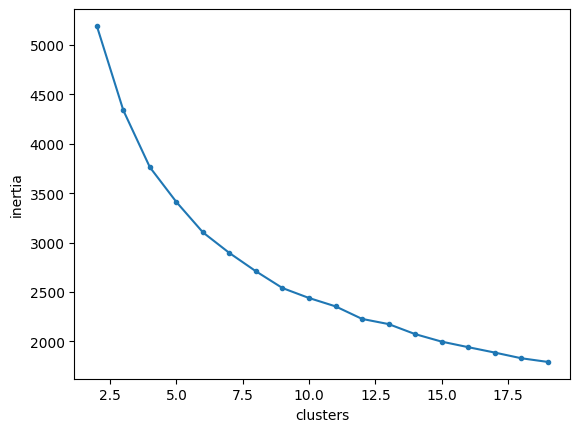

In [ ]:
#Create an empty list of inertias
inertias = []
#Loop through k values between 2 and 10 and store the inertias in the list.
for k in range(2,20):
    kmeans = KMeans(n_clusters=k, random_state=42)  
    kmeans.fit(scaled_df)  
    inertias.append(kmeans.inertia_)
#Visualize scores
plt.plot(range(2,20), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')
#I started with range 101 and looks like theres an elbow before 20
#shrink down to 20 and looks like 5 is the elbow point

when i expand range to 101

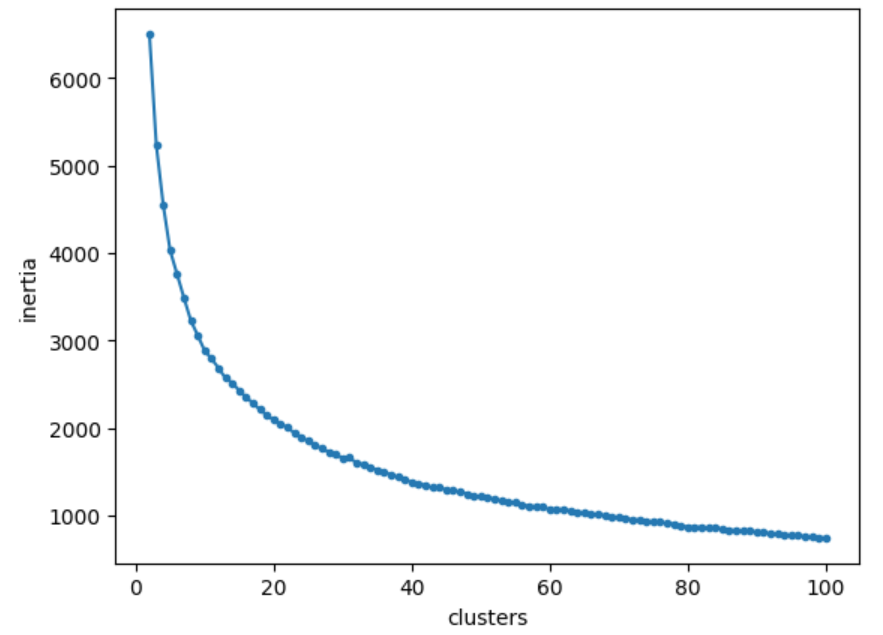

##And a plot of Silhouette Scores.


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

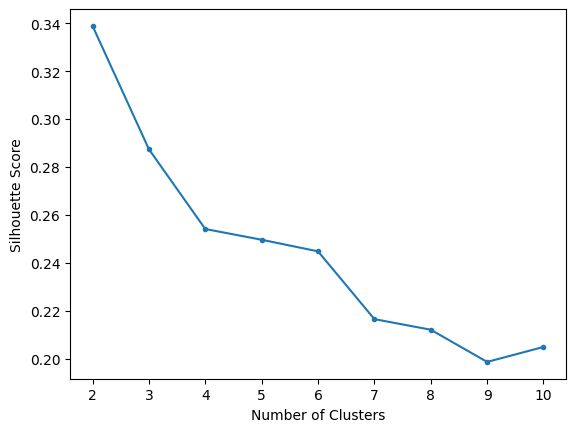

In [ ]:
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');
#higher silhouette score is preferred, which sugegsts 2 clusters

##Choose a K based on the results.

Elbow Plot suggest when the # of cluster is 5 has the best results.

From silhouette scores,  2 cluster is preferred.

#Create analytical visualizations that explore statistics for each feature for each cluster

Despite a relative smaller dataset, I would like take a look on both clusters and see if I can find similiarity or differences between them.

##Cluster=2

In [ ]:
#Refit KMeans with 2 clusters
kmeans2 = KMeans(n_clusters = 2)
kmeans2.fit(scaled_df)
#Save the cluster labels to the dataframe 
df['cluster2'] = kmeans2.labels_
df.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster2
0,41,2,6,19,0.124,1.073,0.0,6.3,0
1,47,1,26,100,4.582,8.218,0.0,12.8,1
2,33,2,10,57,6.111,5.802,1.0,20.9,1
3,29,2,4,19,0.681,0.516,0.0,6.3,0
4,47,1,31,253,9.308,8.908,0.0,7.2,1


In [ ]:
#analyzing clusters
#group the data by cluster and aggregate the groups by the mean values 
#add as_index=False so that the clusters are a column, not the index
cluster_groups = df.groupby('cluster2', as_index=False).mean()
cluster_groups

,cluster2,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,33.135493,1.655376,6.605302,34.153166,0.947096,1.927670,0.262032,9.121208
1,1,42.549708,1.929825,16.350877,96.397661,4.077304,7.649526,0.258993,14.342690


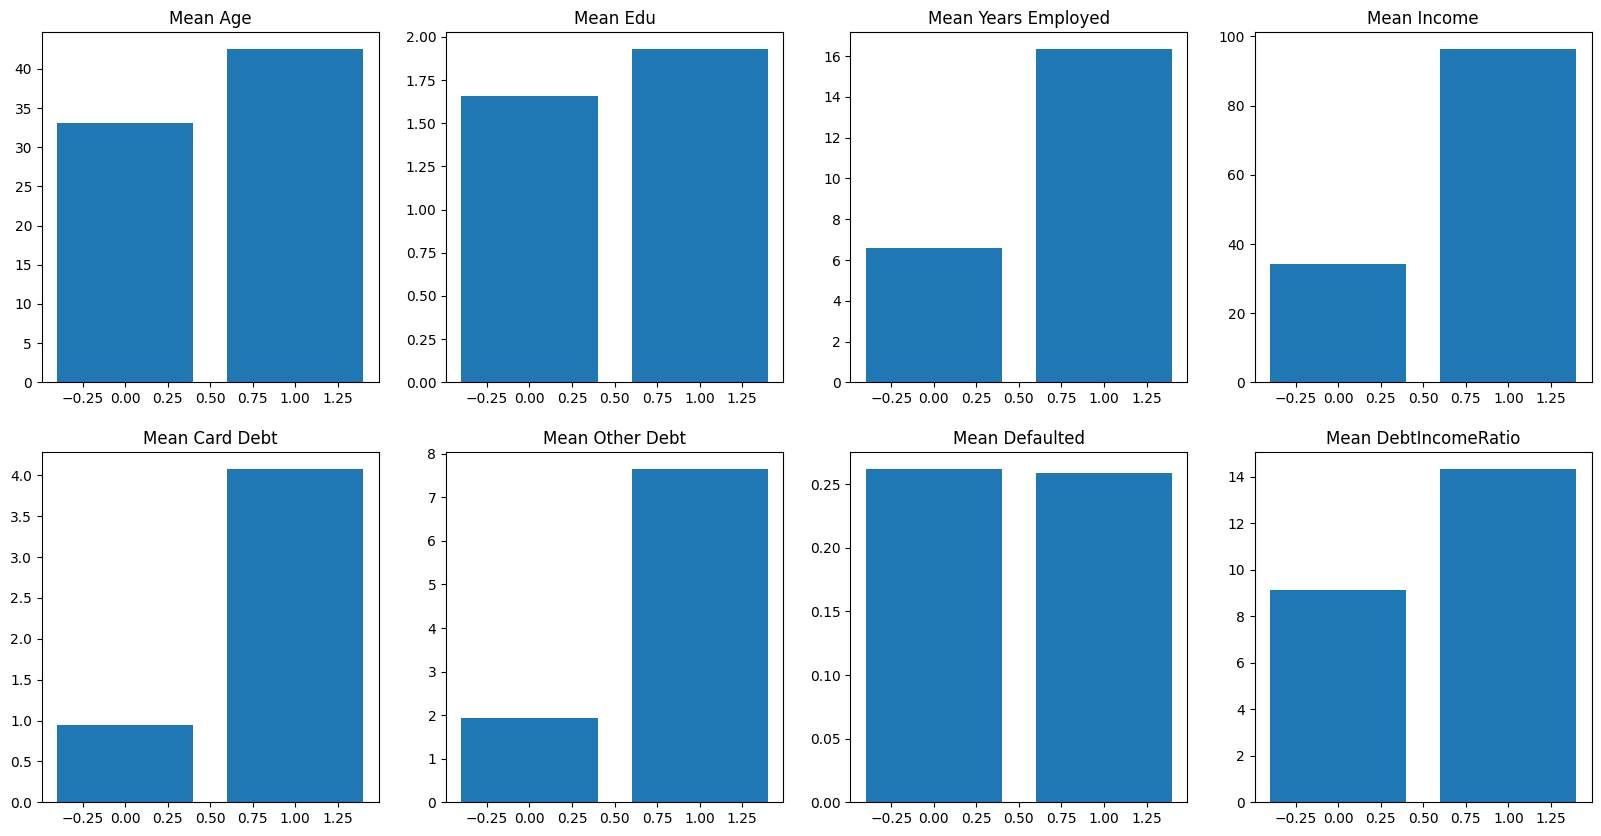

In [ ]:
# Visualize means 
fig, axes = plt.subplots(2,4, figsize = (20, 10))
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster2'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

#Write a description of each cluster based on the visualizations 

- cluster 0: Older generation (up tp early 40s), other than similiar defaulted rate, the rest of the numbers are all higher than cluster 1.

- cluster 1: Younger generation (up tp mid 30s). Similiar defaulted rate as cluster 0, lower mean on the rest of cols.

#Create recommendations for stakeholders (the credit card company) 

How they should market credit cards differently, or which cards they should market, to each cluster based on your data and insights.

First and formost, as a credit card company, we generally would want to encourage customer to spend as much money as possible. The clusters give us a little more background on customers and guide us a way to attract customers to use credit card more often.


Cluser 0 suggests an older generation with better income and more debt, I think that suggests they are willing to take higher risks. Whilst higher risks could lead to higher reward, I would offer them a short term with lower interest credit card to make them keep spending money to pursue higher rewards. For instance, first year 50% lower interest than avg. 13th to 18th month 25% lower and back to normal or higher after that.

Cluser 1 is a younger generation with less income and less debt, I think that suggests they spend their money at a more conservative approach. I would look into what items they spend the most and suggest the company to provide a credit card that has better cashback or discounts on those items.


Few more further actions can be taken after I reach out to the SME:

Credit cards for Cluster 1, younger makes less,
1. no annual fee
2. Low credit loan rate but higher Revolving interest rates since we want to avoid bad debts.
3. cash back on items they'd use the most.


Credit cards for Cluster 0, Rich elderlys,
1. High annual fee
2. Expedit services: 
(1) airport pickup/dropoff 
(2) lounge 
(3) priority reservation at luxury restaurants
3. lower Revolving interest rates since we know they can afford to pay interests. 


##Cluster=5

In [ ]:
kmeans5 = KMeans(n_clusters = 5)
kmeans5.fit(scaled_df)
#Save the cluster labels to the dataframe 
df['cluster5'] = kmeans5.labels_
cluster_groups = df.groupby('cluster5', as_index=False).mean()
cluster_groups

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,cluster5,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster2
0,0,41.694581,1.463054,16.320197,72.374384,1.989369,4.323054,0.012739,9.823153,0.527094
1,1,33.750000,3.489130,5.293478,43.826087,1.164326,2.485087,0.095890,8.829348,0.097826
2,2,31.783439,1.764331,3.955414,30.783439,1.610318,2.774637,0.993590,14.238854,0.095541
3,3,43.325000,2.250000,17.300000,136.925000,8.129825,13.104575,0.593750,19.442500,1.000000
4,4,32.075419,1.310056,6.055866,29.720670,0.702022,1.538961,0.000000,7.894693,0.000000


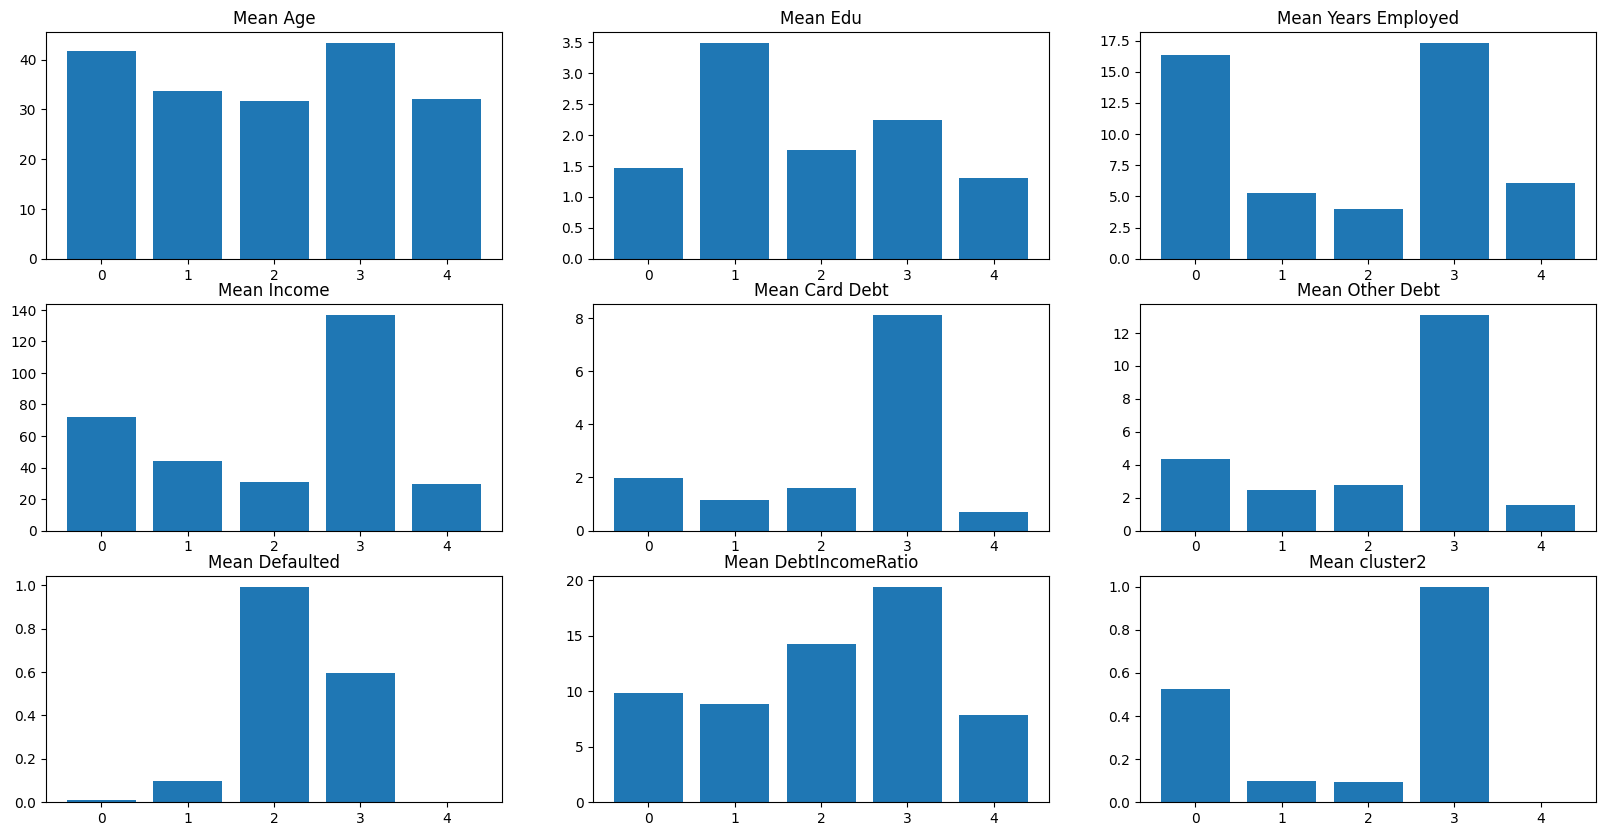

In [ ]:
# Visualize means 
fig, axes = plt.subplots(3,3, figsize = (20, 10))
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster5'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

-age: cluster 0 and 3 are older whilst 1,2,4 are similiarly younger group of age

-debt on card and other are similiar trend.

-mean defaulted doesnt suggest a good reference because its binary (yes or no)

-cluster 3 has high income and high debt

-cluster 0, 1 and 4 suggest the customers who are more conservative on spending because their income are higher than debt. Customer in cluster 2 has relatively higher debtincome ratio.

Recomendation for stakeholder:

- cluster 0, 1 and 4: better cash back programs to encourage them spending more money.

- cluster 2: high interest rates to avoid bad debts.

- cluster 3: High annual fee card,premiun card with priority  and highend services.